In [1]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

'2.8.0'

#### Load Image Data

In [2]:
DATA_LIST = os.listdir('all/train')
DATASET_PATH  = 'all/train'
TEST_DIR =  'all/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 10
NUM_EPOCHS    = 100
LEARNING_RATE = 0.00001

#### Generate Training and Validation Batches

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')


train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=False,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="categorical")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=False,batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,class_mode="categorical")

Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


C:\Users\rexzo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras_preprocessing\image\image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


####  Build Model

In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import applications 

In [5]:
conv_base_1=applications.VGG16(include_top=False,weights="imagenet",input_shape=(224,224,3))
conv_base_1.trainable=False
model_1=models.Sequential()
model_1.add(conv_base_1)
model_1.add(layers.Flatten())
model_1.add(layers.Dense(4096,activation="relu"))
model_1.add(layers.Dropout(0.5))
model_1.add(layers.Dense(1024,activation="relu"))
model_1.add(layers.Dropout(0.5))
model_1.add(layers.Dense(256,activation="relu"))
model_1.add(layers.Dense(64,activation="relu",name='feature_dense_1'))
model_1.add(layers.Dense(3,activation="softmax"))

print(model_1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 4096)              102764544 
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              4195328   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2

In [6]:
conv_base_2=applications.InceptionV3(include_top=False,weights="imagenet",input_shape=(224,224,3))
conv_base_2.trainable=False
model_2=models.Sequential()
model_2.add(conv_base_2)
model_2.add(layers.Flatten())
model_2.add(layers.Dense(4096,activation="relu"))
model_2.add(layers.Dropout(0.5))
model_2.add(layers.Dense(1024,activation="relu"))
model_2.add(layers.Dropout(0.5))
model_2.add(layers.Dense(256,activation="relu"))
model_2.add(layers.Dense(64,activation="relu",name='feature_dense_2'))
model_2.add(layers.Dense(3,activation="softmax"))

print(model_2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_4 (Dense)             (None, 4096)              209719296 
                                                                 
 dropout_2 (Dropout)         (None, 4096)              0         
                                                                 
 dense_5 (Dense)             (None, 1024)              4195328   
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 256)              

#### Train Model

In [7]:
model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                loss='categorical_crossentropy',
                metrics=['acc'])

In [8]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                loss='categorical_crossentropy',
                metrics=['acc'])

In [9]:
print(len(train_batches))
print(len(valid_batches))
STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size
history_1=model_1.fit(train_batches,steps_per_epoch=STEP_SIZE_TRAIN,validation_steps=STEP_SIZE_VALID,epochs=NUM_EPOCHS,validation_data=valid_batches,verbose=1)

24
6
Epoch 1/100


C:\Users\rexzo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\rexzo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras_preprocessing\image\image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


24/24 [==============================] - 29s 1s/step - loss: 1.2827 - acc: 0.2875 - val_loss: 1.1446 - val_acc: 0.3333
Epoch 2/100
24/24 [==============================] - 27s 1s/step - loss: 1.2167 - acc: 0.3208 - val_loss: 1.0993 - val_acc: 0.3500
Epoch 3/100
24/24 [==============================] - 27s 1s/step - loss: 1.2067 - acc: 0.3542 - val_loss: 1.0938 - val_acc: 0.3333
Epoch 4/100
24/24 [==============================] - 27s 1s/step - loss: 1.1397 - acc: 0.3583 - val_loss: 1.0768 - val_acc: 0.3667
Epoch 5/100
24/24 [==============================] - 27s 1s/step - loss: 1.0888 - acc: 0.4417 - val_loss: 1.0913 - val_acc: 0.3667
Epoch 6/100
24/24 [==============================] - 27s 1s/step - loss: 1.1317 - acc: 0.3542 - val_loss: 1.1132 - val_acc: 0.3333
Epoch 7/100
24/24 [==============================] - 27s 1s/step - loss: 1.0555 - acc: 0.4458 - val_loss: 1.0677 - val_acc: 0.3333
Epoch 8/100
24/24 [==============================] - 27s 1s/step - loss: 1.1057 - acc: 0.4208 -

In [10]:
print(len(train_batches))
print(len(valid_batches))
STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size
history_2=model_2.fit(train_batches,steps_per_epoch=STEP_SIZE_TRAIN,validation_steps=STEP_SIZE_VALID,epochs=NUM_EPOCHS,validation_data=valid_batches,verbose=1)

24
6
Epoch 1/100
24/24 [==============================] - 28s 1s/step - loss: 1.5032 - acc: 0.3583 - val_loss: 1.2826 - val_acc: 0.3833
Epoch 2/100
24/24 [==============================] - 24s 1s/step - loss: 1.2471 - acc: 0.4125 - val_loss: 0.9642 - val_acc: 0.5833
Epoch 3/100
24/24 [==============================] - 24s 1s/step - loss: 1.1640 - acc: 0.4458 - val_loss: 0.8228 - val_acc: 0.6667
Epoch 4/100
24/24 [==============================] - 25s 1s/step - loss: 1.0236 - acc: 0.4750 - val_loss: 0.8561 - val_acc: 0.6167
Epoch 5/100
24/24 [==============================] - 24s 1s/step - loss: 0.7974 - acc: 0.6667 - val_loss: 0.8204 - val_acc: 0.5667
Epoch 6/100
24/24 [==============================] - 24s 1s/step - loss: 1.0513 - acc: 0.5250 - val_loss: 0.6155 - val_acc: 0.7333
Epoch 7/100
24/24 [==============================] - 25s 1s/step - loss: 0.7665 - acc: 0.6750 - val_loss: 0.5674 - val_acc: 0.8000
Epoch 8/100
24/24 [==============================] - 25s 1s/step - loss: 0.752

24/24 [==============================] - 24s 1s/step - loss: 0.2661 - acc: 0.9167 - val_loss: 0.9277 - val_acc: 0.7500
Epoch 64/100
24/24 [==============================] - 24s 1s/step - loss: 0.2887 - acc: 0.8750 - val_loss: 0.6760 - val_acc: 0.6833
Epoch 65/100
24/24 [==============================] - 24s 1s/step - loss: 0.3034 - acc: 0.8500 - val_loss: 0.6698 - val_acc: 0.7167
Epoch 66/100
24/24 [==============================] - 25s 1s/step - loss: 0.3527 - acc: 0.8792 - val_loss: 0.9521 - val_acc: 0.7000
Epoch 67/100
24/24 [==============================] - 24s 1s/step - loss: 0.2804 - acc: 0.8750 - val_loss: 0.7323 - val_acc: 0.7500
Epoch 68/100
24/24 [==============================] - 24s 1s/step - loss: 0.2649 - acc: 0.9042 - val_loss: 1.0022 - val_acc: 0.6167
Epoch 69/100
24/24 [==============================] - 24s 1s/step - loss: 0.2617 - acc: 0.8833 - val_loss: 0.8743 - val_acc: 0.6833
Epoch 70/100
24/24 [==============================] - 25s 1s/step - loss: 0.2829 - acc: 0

####  Plot Accuracy and Loss During Training

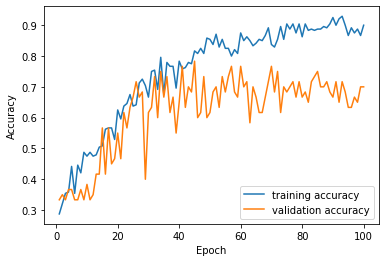

In [11]:
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
e_arr=list(range(1,101))
plt.plot(e_arr,history_1.history['acc'],fillstyle="left",label='training accuracy')
plt.plot(e_arr,history_1.history['val_acc'],fillstyle="right",label = 'validation accuracy')
plt.legend(loc='lower right')
plt.show()

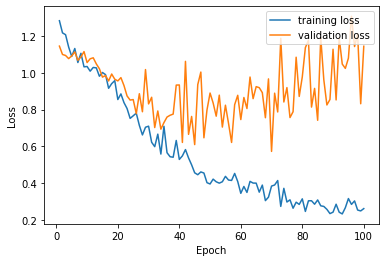

In [12]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
e_arr=list(range(1,101))
plt.plot(e_arr,history_1.history['loss'],fillstyle="left",label='training loss')
plt.plot(e_arr,history_1.history['val_loss'],fillstyle="right",label = 'validation loss')
plt.legend(loc='upper right')
plt.show()

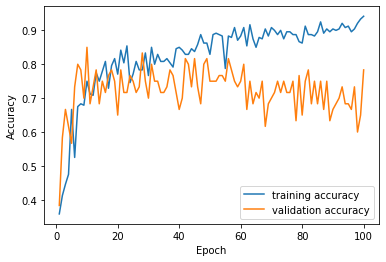

In [13]:
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
e_arr=list(range(1,101))
plt.plot(e_arr,history_2.history['acc'],fillstyle="left",label='training accuracy')
plt.plot(e_arr,history_2.history['val_acc'],fillstyle="right",label = 'validation accuracy')
plt.legend(loc='lower right')
plt.show()

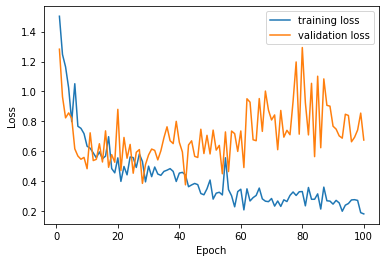

In [14]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
e_arr=list(range(1,101))
plt.plot(e_arr,history_2.history['loss'],fillstyle="left",label='training loss')
plt.plot(e_arr,history_2.history['val_loss'],fillstyle="right",label = 'validation loss')
plt.legend(loc='upper right')
plt.show()

#### Testing Model

In [15]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="categorical")
eval_generator.reset()
print(len(eval_generator))
x = model_1.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

Found 60 images belonging to 3 classes.
60
 1/60 [..............................] - ETA: 7s - loss: 1.0147 - acc: 0.0000e+00

C:\Users\rexzo\AppData\Local\Temp\ipykernel_21728\1493150212.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  x = model_1.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),


60/60 [==============================] - 6s 95ms/step - loss: 1.2586 - acc: 0.7167
Test loss: 1.258617877960205
Test accuracy: 0.7166666388511658


In [16]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="categorical")
eval_generator.reset()
print(len(eval_generator))
x = model_2.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

Found 60 images belonging to 3 classes.
60
 1/60 [..............................] - ETA: 6s - loss: 0.0052 - acc: 1.0000

C:\Users\rexzo\AppData\Local\Temp\ipykernel_21728\738531987.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  x = model_2.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),


60/60 [==============================] - 5s 78ms/step - loss: 0.0360 - acc: 1.0000
Test loss: 0.03604675084352493
Test accuracy: 1.0


##  TSNE Plot

In [17]:
from sklearn.manifold import TSNE

intermediate_layer_model_1 = models.Model(inputs=model_1.input,
                                        outputs=model_1.get_layer('feature_dense_1').output)
intermediate_layer_model_2 = models.Model(inputs=model_2.input,
                                        outputs=model_2.get_layer('feature_dense_2').output)
tsne_eval_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="categorical")

Found 300 images belonging to 3 classes.


In [18]:
X_predicted_1=intermediate_layer_model_1.predict(tsne_eval_generator)
X_embedded_1 = TSNE(n_components=2).fit_transform(X_predicted_1)

C:\Users\rexzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\rexzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [19]:
X_predicted_2=intermediate_layer_model_2.predict(tsne_eval_generator)
X_embedded_2 = TSNE(n_components=2).fit_transform(X_predicted_2)

C:\Users\rexzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\rexzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


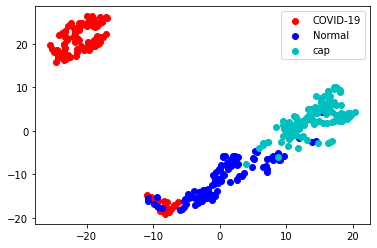

In [20]:
for i in range(len(tsne_eval_generator)):
    color=tsne_eval_generator[i][1].argmax()
    if color==0:
        s1=plt.scatter(X_embedded_1[i, 0], X_embedded_1[i, 1],c='r')
    elif color==1:
        s2=plt.scatter(X_embedded_1[i, 0], X_embedded_1[i, 1],c='b')
    elif color==2:
        s3=plt.scatter(X_embedded_1[i, 0], X_embedded_1[i, 1],c='c')
plt.legend((s1,s2,s3),('COVID-19','Normal','cap') ,loc = 'best')
plt.show()

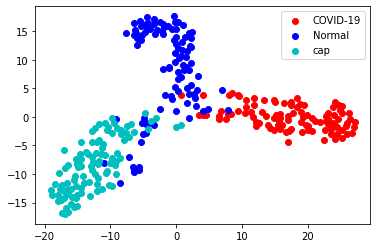

In [21]:
for i in range(len(tsne_eval_generator)):
    color=tsne_eval_generator[i][1].argmax()
    if color==0:
        s1=plt.scatter(X_embedded_2[i, 0], X_embedded_2[i, 1],c='r')
    elif color==1:
        s2=plt.scatter(X_embedded_2[i, 0], X_embedded_2[i, 1],c='b')
    elif color==2:
        s3=plt.scatter(X_embedded_2[i, 0], X_embedded_2[i, 1],c='c')
plt.legend((s1,s2,s3),('COVID-19','Normal','cap') ,loc = 'best')
plt.show()

<!-- ## Task 2: COVID-19 vs Normal vs Tertiary Pneumonia (Bacterial and Viral) -->

<!-- #### Renew Training Batch and Validation Batch -->

<!-- #### Renew Model -->